# Lorenz Equations
Bryant McArthur

October 13, 2022

Math 437

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [3]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    
    return np.array([10*(x[1]-x[0]), 28*x[0] - x[1] - x[0]*x[2], x[0]*x[1] - (8/3)*x[2]])


<IPython.core.display.Javascript object>


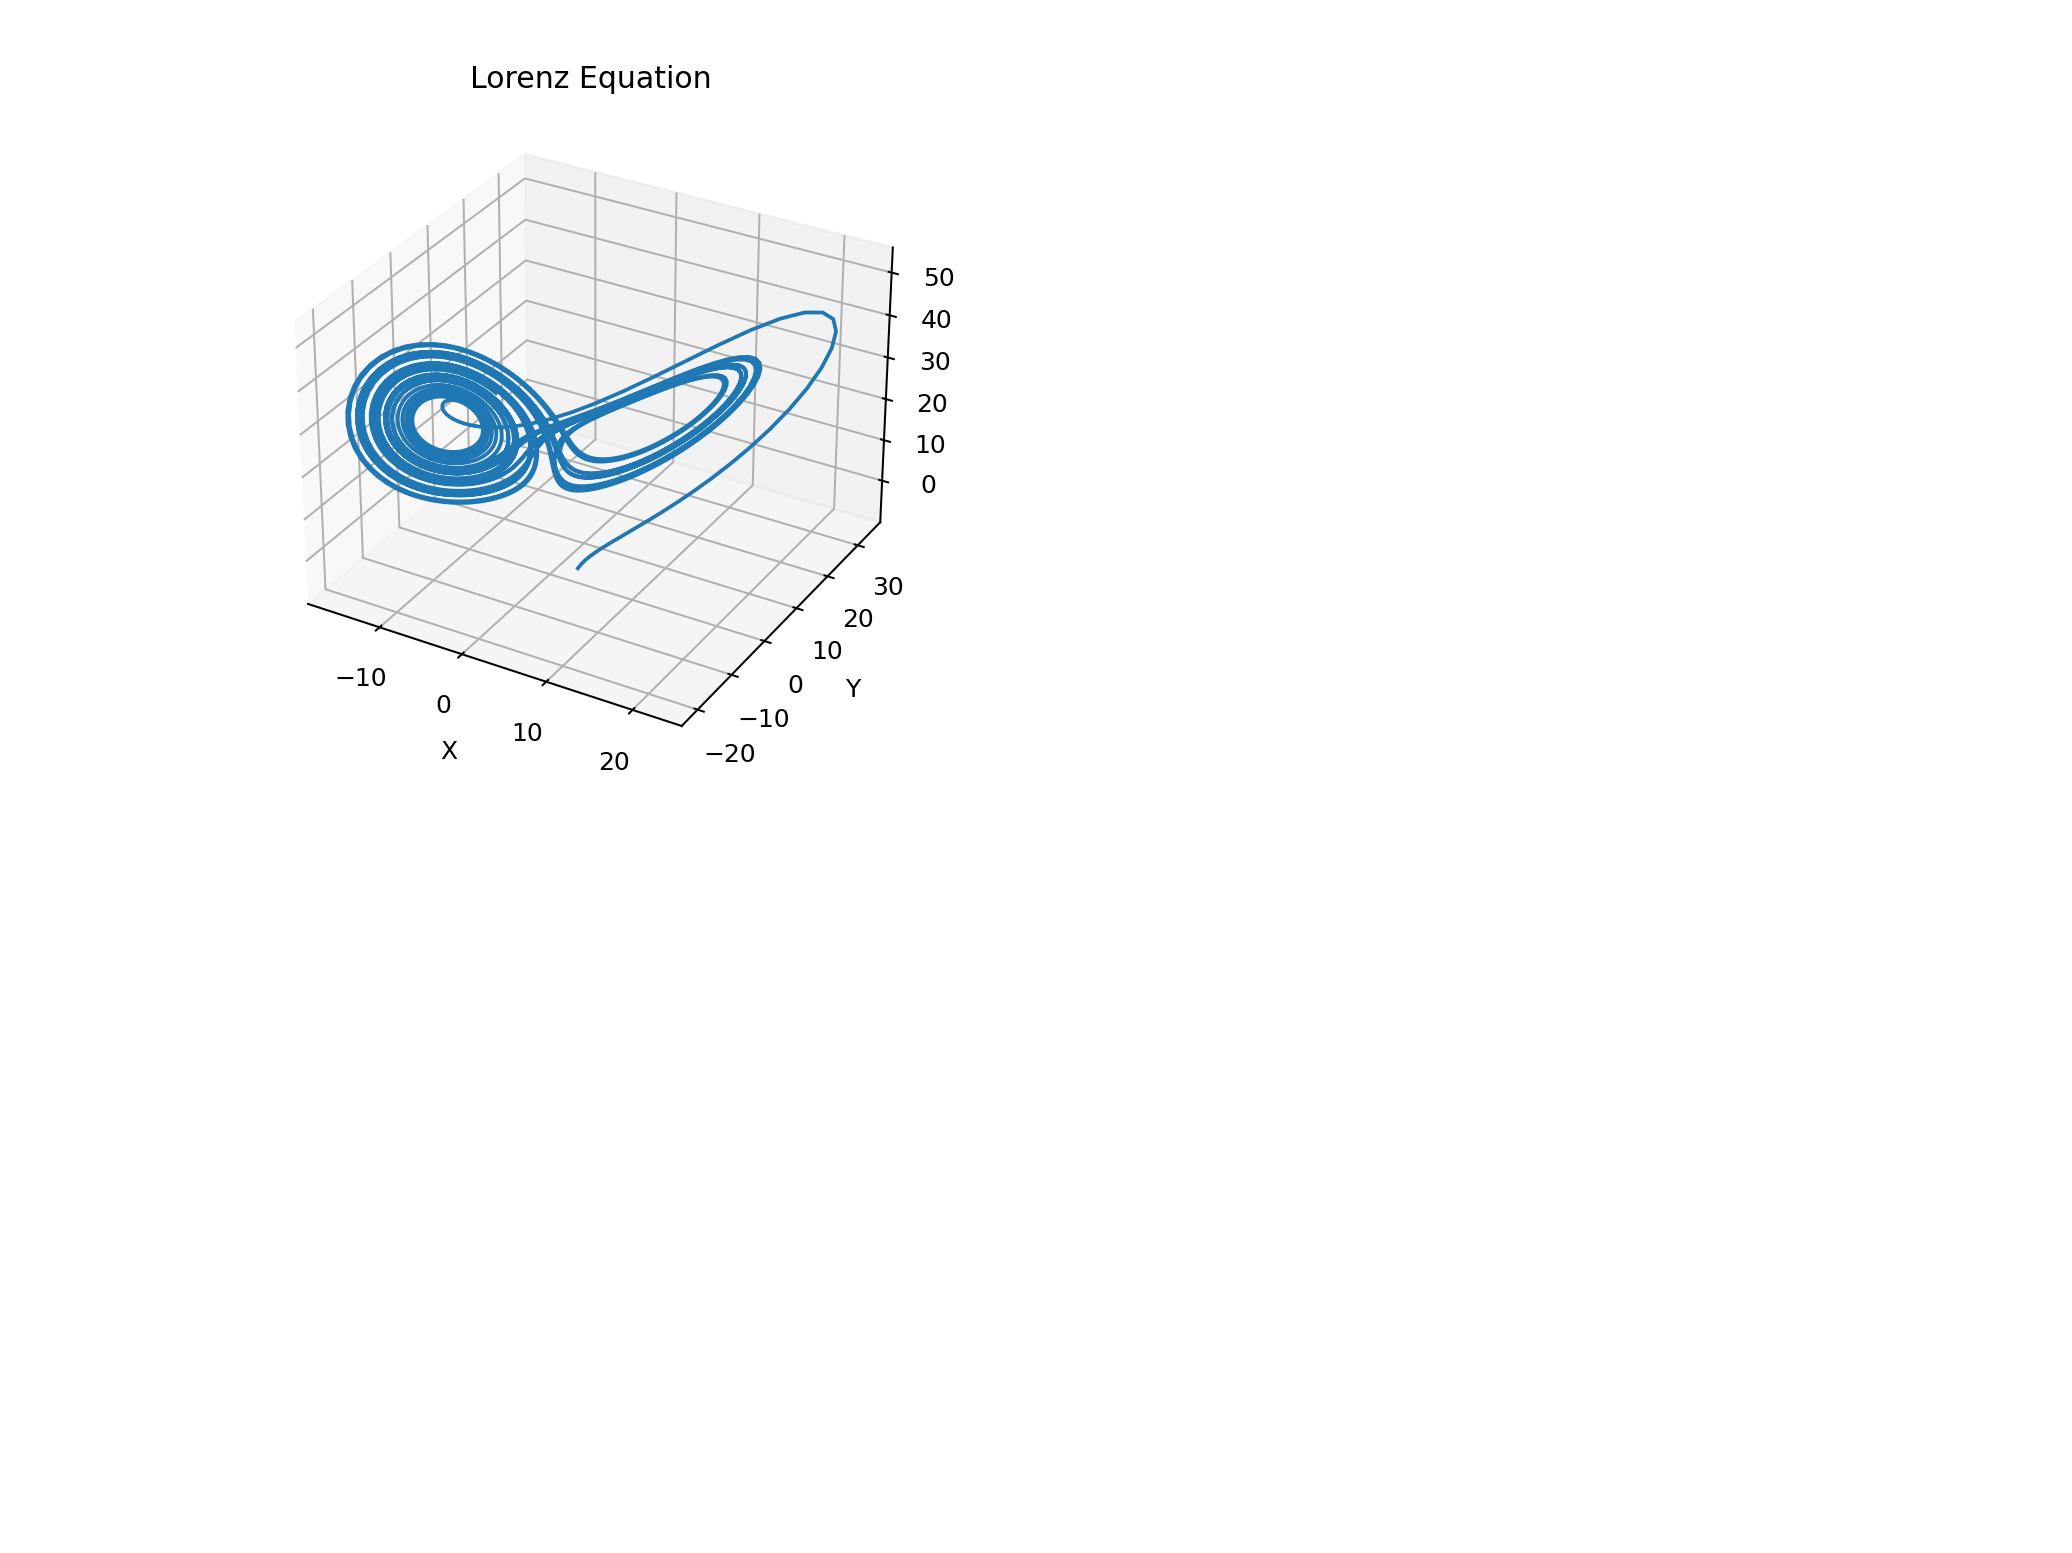

In [4]:
x0 = np.random.uniform(-15,15,(3,))

# Set up time
t0 = 0
tf = 25
t = np.linspace(0, 25, 5000)

# Solve the IVP
sol = solve_ivp(lorenz, (t0,tf), x0, max_step = .01)

# Plot
# Set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.plot(sol.y[0], sol.y[1], sol.y[2])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lorenz Equation")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


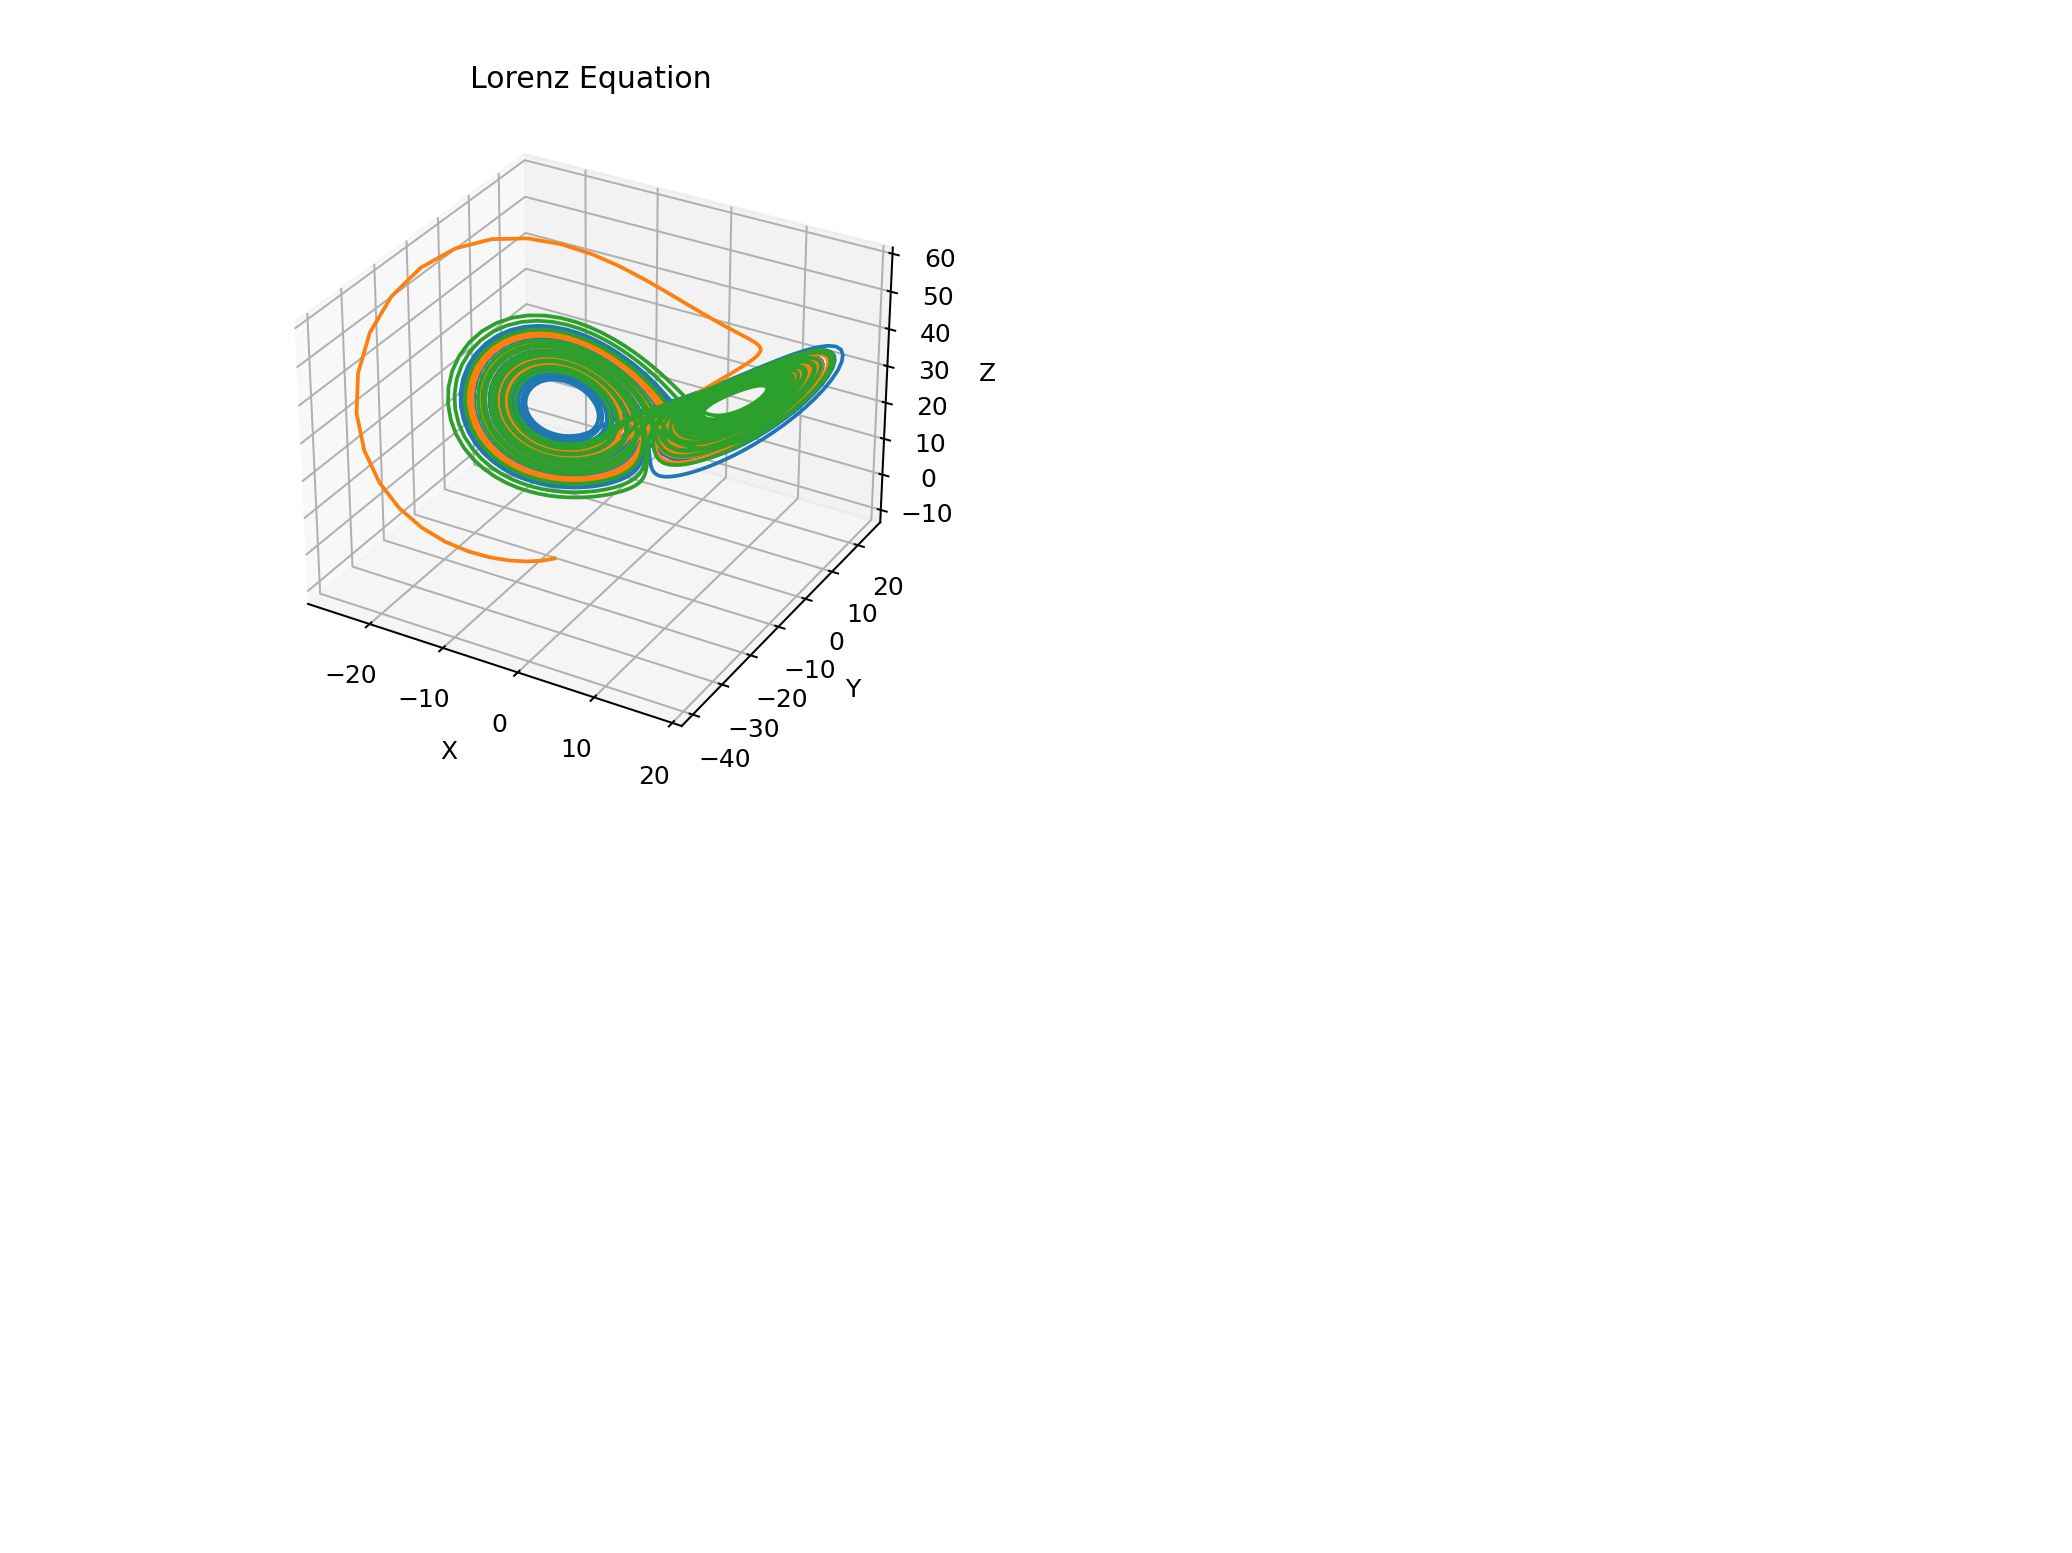

In [5]:
# Set up the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("Z")
for i in range(3):
    x0 = np.random.uniform(-15,15,(3,))

    # Set up time
    t0 = 0
    tf = 25
    t = np.linspace(0, 25, 5000)

    # Solve the IVP
    sol = solve_ivp(lorenz, (t0,tf), x0, max_step = .01)

    # Plot
    plt.plot(sol.y[0], sol.y[1], sol.y[2])
    
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Lorenz Equation")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [37]:
x0 = np.random.uniform(-15,15,(3,))
x2_0 = x0 + np.random.randn(3)*(1e-2)

# Set up time
t0 = 0
tf = 25
t = np.linspace(0, 25, 1500)

# Solve the IVP
sol1 = solve_ivp(lorenz, (t0,tf), x0, t_eval = t)
sol2 = solve_ivp(lorenz, (t0,tf), x2_0, t_eval = t)
solutions = [sol1,sol2]

In [38]:
def update(i):
        
    for j in range(2):
        point_traj[j].set_data_3d(solutions[j].y[0][:i+1], solutions[j].y[1][:i+1], solutions[j].y[2][:i+1])
        point[j].set_data_3d(solutions[j].y[0][i], solutions[j].y[1][i], solutions[j].y[2][i])
    
    return point, point_traj

In [39]:
# Set up animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
    
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_ylim((-20, 30))
ax.set_xlim((-30, 30))
ax.set_zlim((0, 50))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

labels = ["Original", "Perturbed"]
# Plot planet points and trajectories
point = [plt.plot([],[],[], marker = 'o', color=col)[0] for col in ['y','k']]
point_traj = [plt.plot([],[],[], color=col, alpha = 1, label = labels[i])[0] for i,col in enumerate(['y','k'])]

plt.legend()
plt.title("Lorenz Trajectories")

# Save Animation
ani = animation.FuncAnimation(fig, update, frames=range(1500), interval=10)
ani.save('lorenz_animation1.mp4')

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [73]:
x0 = np.random.uniform(-15,15,(3,))

# Set up time
t0 = 0
tf = 50
t = np.linspace(0, 50, 1000)

# Solve the IVP
sol1 = solve_ivp(lorenz, (t0,tf), x0, t_eval = t, atol=1e-15, rtol=1e-13)
sol2 = solve_ivp(lorenz, (t0,tf), x0, t_eval = t, atol=1e-12, rtol=1e-10)
solutions = [sol1,sol2]

In [74]:
# Set up animation
animation.writer = animation.writers['ffmpeg']
plt.ioff()
    
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_ylim((-20, 30))
ax.set_xlim((-30, 30))
ax.set_zlim((0, 50))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

labels = ["First", "Second"]
# Plot planet points and trajectories
point = [plt.plot([],[],[], marker = 'o', color=col)[0] for col in ['y','k']]
point_traj = [plt.plot([],[],[], color=col, alpha = 1, label = labels[i])[0] for i,col in enumerate(['y','k'])]

plt.legend()
plt.title("Lorenz Trajectories")

# Save Animation
ani = animation.FuncAnimation(fig, update, frames=range(1000), interval=10)
ani.save('lorenz_animation2.mp4')

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

<IPython.core.display.Javascript object>


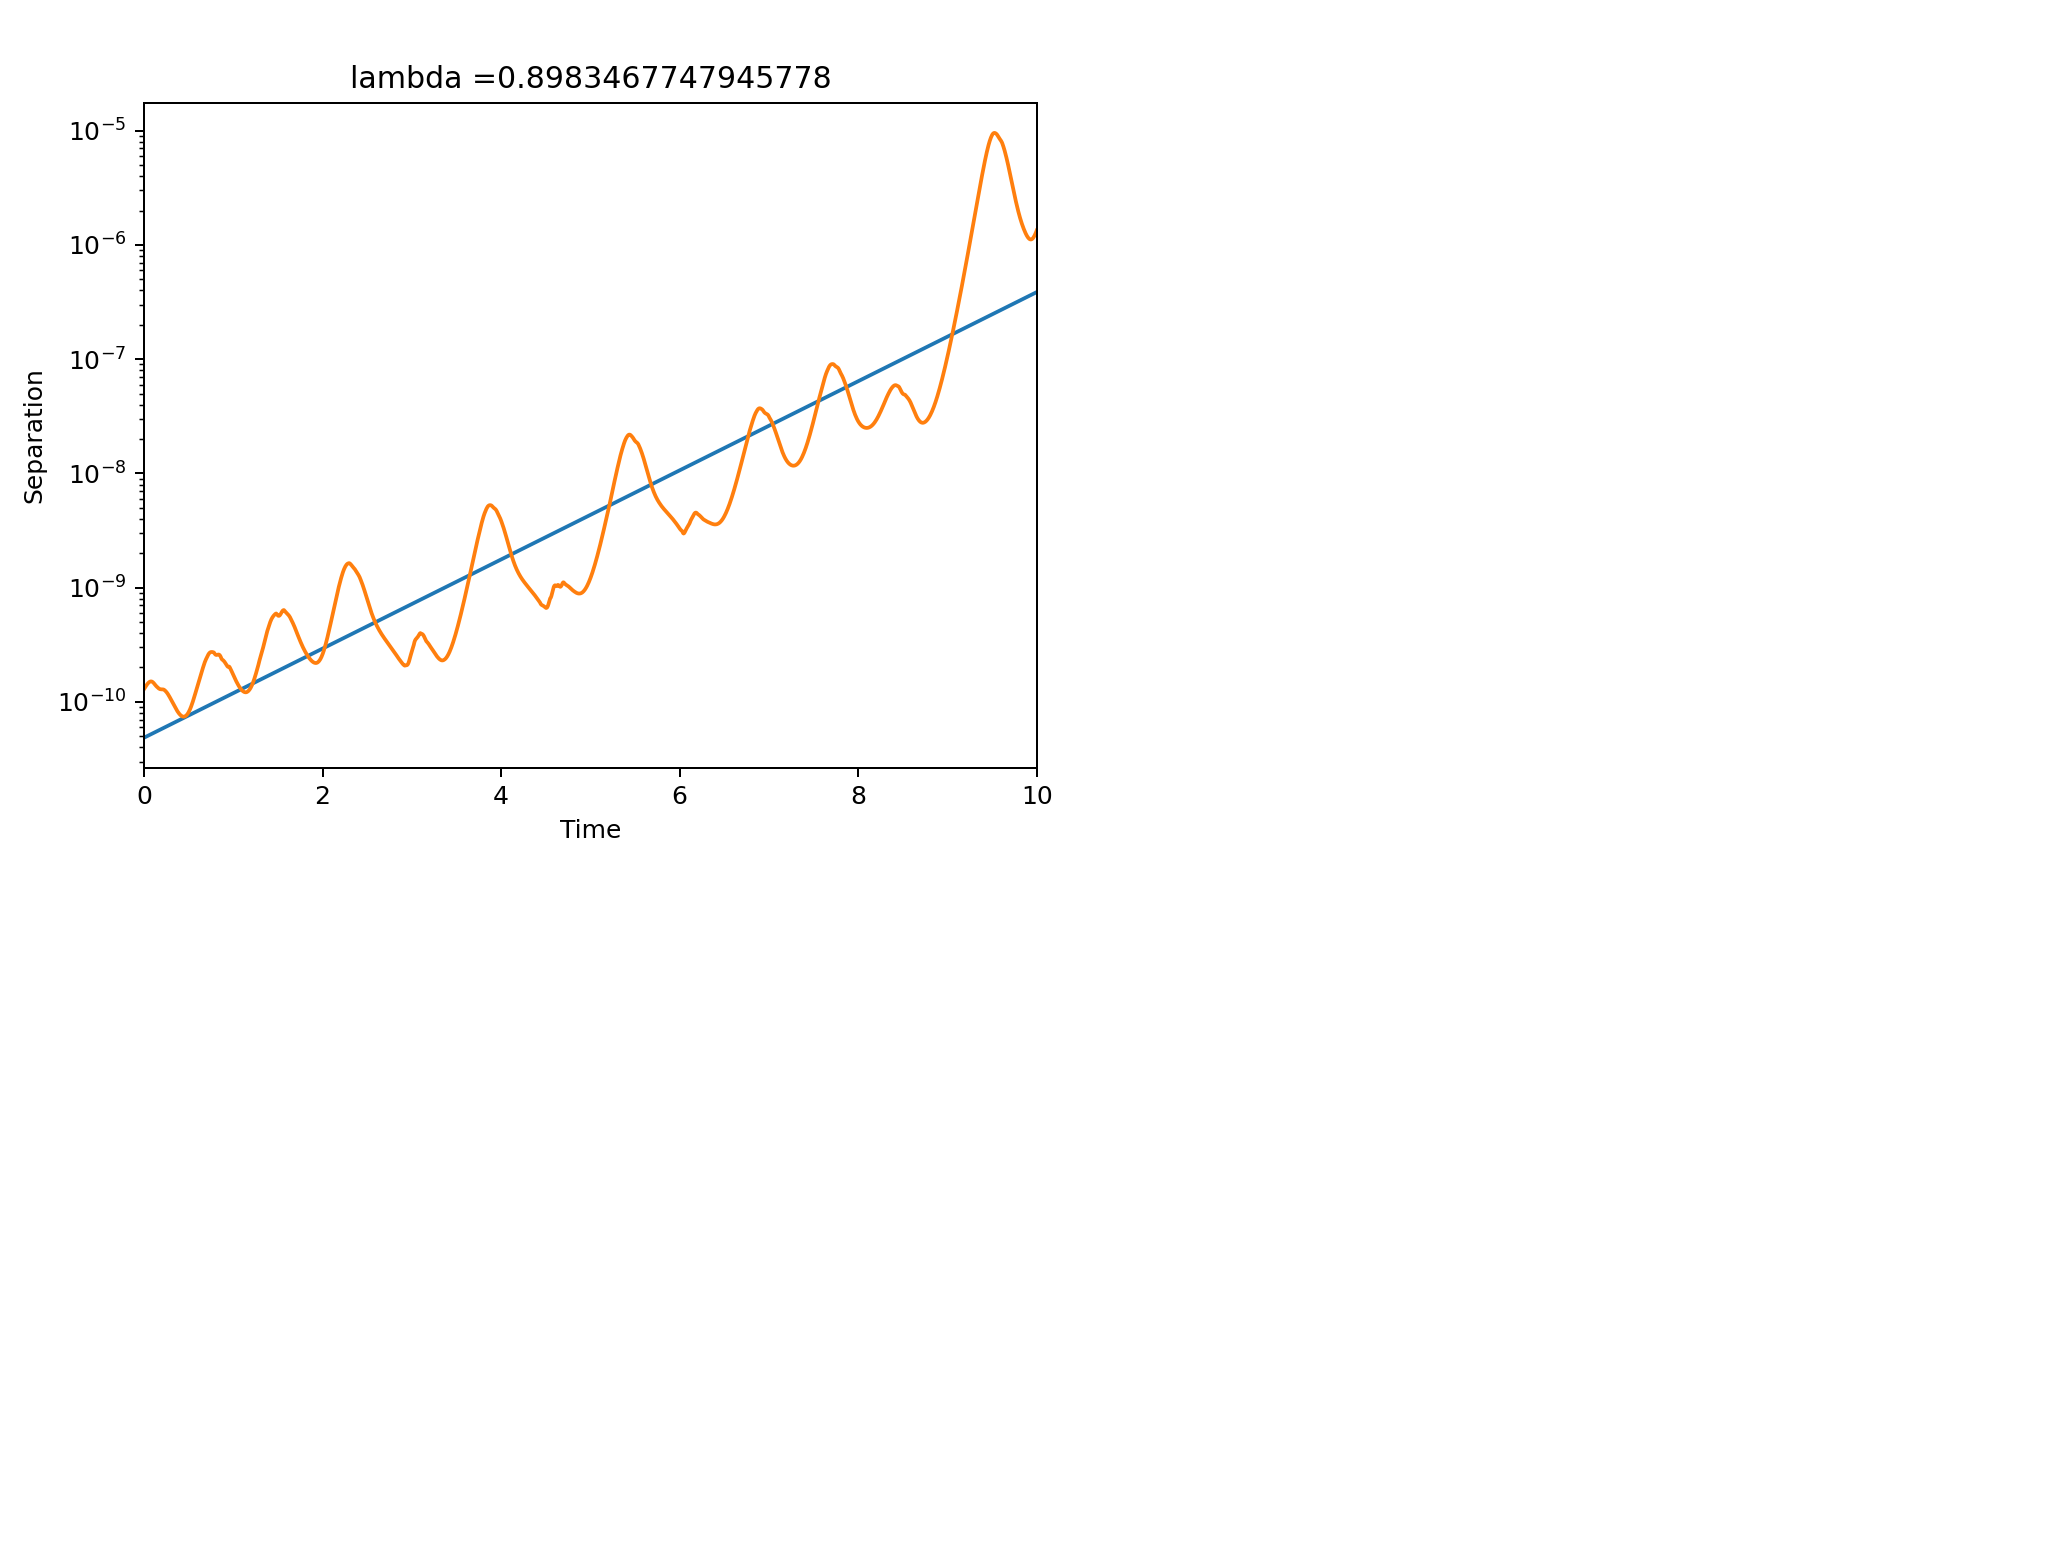

In [66]:
x0 = np.array([sol1.y[0][-1], sol1.y[1][-1], sol1.y[2][-1]])
x2_0 = x0 + np.random.randn(3)*(1e-10)

# Set up time
t0 = 0
tf = 10
t = np.linspace(0, 10, 1500)

# Solve the IVP
sol1 = solve_ivp(lorenz, (t0,tf), x0, t_eval = t)
sol2 = solve_ivp(lorenz, (t0,tf), x2_0, t_eval = t)
solutions = [sol1,sol2]

d = np.linalg.norm(sol1.y - sol2.y, axis=0)

best = linregress(t, np.log(d))
m,b = best[0],best[1]

plt.semilogy(t, np.exp(m*t+b))
plt.semilogy(t, d)
plt.xlim(0,10)
plt.title(f"lambda ={m}")
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()
